# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0$

* $x' = v_x$

* $v_y' = -g$

* $y' = v_y$

Code the equations into a function 

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def proj_vac(t,state):
    x = state[0]
    y = state[1]
    vx = state[2]
    vy = state[3]
    
    dx = vx
    dy = vy
    dvx = 0
    dvy = -9.81
    
    dstate = np.array([dx, dy, dvx, dvy])
    
    return dstate
    


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [3]:
VX_0 = 300*np.sin(50*np.pi/180)
VY_0 = 300*np.cos(50*np.pi/180)
state_0 = np.array([0, 0, VX_0, VY_0]) # Enter these
t0 = 0 #s
tf = 50 #s
n = 250
t1 = np.linspace(t0,tf,n)
sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),state_0,method="RK45", t_eval=t1)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

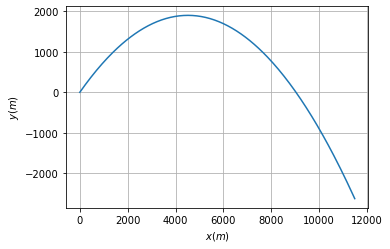

In [4]:
xs = sol_RK45.y[0]
ys = sol_RK45.y[1]

fig = plt.figure("x vs. y")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

#draw curves
ax.plot(xs,ys)
ax.set_xlabel(r'$x (m)$')
ax.set_ylabel(r'$y (m)$')
ax.grid();

In [5]:
t_ground = sol_RK45.t[np.where(ys <= 0)][1]
print("The ball hits the ground at " + str(t_ground) + " seconds")

The ball hits the ground at 39.3574297188755 seconds


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [6]:
#codes
def rungekutta_4(f,t,x0):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range(0,n-1):
        h = t[i+1] - t[i]
        K1 = h*f(t[i],x[i])
        K2 = h*f(t[i] + h/2, x[i] + K1/2)
        K3 = h*f(t[i] + h/2, x[i] + K2/2)
        K4 = h*f(t[i] + h, x[i] + K3)
        x[i+1] = x[i] + K1/6 + K2/3 + K3/3 + K4/6
    return x

In [7]:
sol_rk4 = rungekutta_4(proj_vac,t1,state_0) #args order matters! they must match our equaton function order
xs_rk4 = sol_rk4[:,0]
ys_rk4 = sol_rk4[:,1]

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

They have same path on the graph


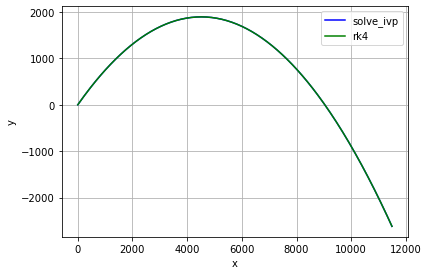

In [8]:
fig = plt.figure('Runge-Kutta 4')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw xs and ys
ax.plot(xs,ys,'b', label=r'solve_ivp')
ax.plot(xs_rk4,ys_rk4,'g', label=r'rk4')


ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

print("They have same path on the graph")

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = -\frac{c}{m}\sqrt{v^2_x +v^2_y}v_x$

* $x' = v_x $

* $v_y' = -g -\frac{c}{m}\sqrt{v^2_x +v^2_y}v_x$

* $y' = v_y$

Code the equations into a function

In [9]:
#code
#define projectile motion function in vaccum
def proj_vac_drag(t,state, c, m):
    x = state[0]
    y = state[1]
    vx = state[2]
    vy = state[3]
    
    g = 9.81
    
    dx = vx
    dy = vy
    dvx = -(c*vx/m)*(vx**2 + vy**2)**(1/2)
    dvy = -g - (c*vy/m)*(vx**2 + vy**2)**(1/2)
    
    dstate = [dx, dy, dvx, dvy]
    
    return dstate

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [10]:
D = 0.15 # m
p = 7800 # kg/m3
gamma = 0.25 # Ns2/m4
c = gamma*D*D
m = p*np.pi*D*D/3

t0 = 0 #s
tf = 35 #s
n = 250
t1 = np.linspace(t0,tf,n)

sol_RK45_drag_vac = integrate.solve_ivp(proj_vac_drag,(t0,tf),state_0,method='RK45', t_eval=t1, args = (c,m))


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

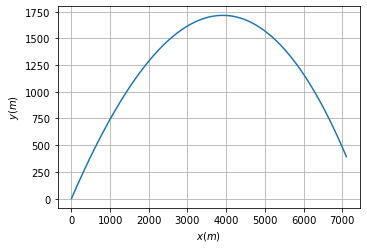

In [11]:
#codes
xs_drag_vac = sol_RK45_drag_vac.y[0]
ys_drag_vac = sol_RK45_drag_vac.y[1]

fig = plt.figure("x vs. y")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

#draw curves
ax.plot(xs_drag_vac,ys_drag_vac)
ax.set_xlabel(r'$x (m)$')
ax.set_ylabel(r'$y (m)$')
ax.grid();

In [12]:
print("Horizontal range is " + str(np.max(ys_drag_vac)) + " m")
print("The ball doesn't hit the ground in 35 seconds")


Horizontal range is 1715.244405506016 m
The ball doesn't hit the ground in 35 seconds


In [13]:
t02 = 0 #s
tf2 = 50 #s
n = 250
t2 = np.linspace(t02,tf2,n)

sol_RK45_drag_vac2 = integrate.solve_ivp(proj_vac_drag,(t02,tf2),state_0,method='RK45', t_eval=t2, args = (c,m))
t_ground = sol_RK45_drag_vac2.t[np.where(sol_RK45_drag_vac2.y[1] <= 0)][1]
print("The ball hits the ground at " + str(t_ground) + " seconds")

The ball hits the ground at 37.55020080321285 seconds


# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = -\frac{1}{m}\gamma D^2exp(-y/\lambda)\sqrt{v^2_x +v^2_y}\,v_x$

* $x' = v_x $

* $v_y' = -g -\frac{1}{m}\gamma D^2exp(-y/\lambda)\sqrt{v^2_x +v^2_y}\,v_y$

* $y' = v_y$

Code the equations into a function

In [14]:
#code
def proj_drag(t,state, c, m, lmbd):
    x = state[0]
    y = state[1]
    vx = state[2]
    vy = state[3]
    
    g = 9.81
    
    dx = vx
    dy = vy
    dvx = -np.exp(-y/lmbd)*(c*vx/m)*(vx**2 + vy**2)**(1/2)
    dvy = -g - np.exp(-y/lmbd)*(c*vy/m)*(vx**2 + vy**2)**(1/2)
    
    dstate = [dx, dy, dvx, dvy]
    
    return dstate

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [15]:
#codes
lmbd = 10000 # m
sol_RK45_drag = integrate.solve_ivp(proj_drag,(t0,tf),state_0,method='RK45', t_eval=t1, args = (c,m,lmbd))


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

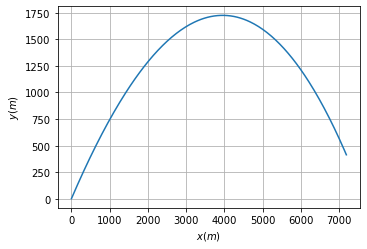

In [16]:
#codes
xs_drag = sol_RK45_drag.y[0]
ys_drag = sol_RK45_drag.y[1]

fig = plt.figure("x vs. y")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

#draw curves
ax.plot(xs_drag,ys_drag)
ax.set_xlabel(r'$x (m)$')
ax.set_ylabel(r'$y (m)$')
ax.grid();

In [17]:
print("Horizontal range is " + str(np.max(ys_drag)) + " m")
print("The ball doesn't hit the ground in 35 seconds")

Horizontal range is 1724.979807692912 m
The ball doesn't hit the ground in 35 seconds


In [18]:
sol_RK45_drag2 = integrate.solve_ivp(proj_drag,(t02,tf2),state_0,method='RK45', t_eval=t2, args = (c,m,lmbd))
t_ground = sol_RK45_drag2.t[np.where(sol_RK45_drag2.y[1] <= 0)][1]
print("The ball hits the ground at " + str(t_ground) + " seconds")

The ball hits the ground at 37.55020080321285 seconds


# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

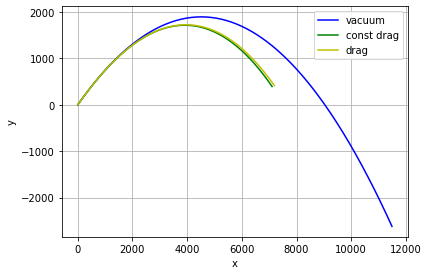

In [19]:
#codes
fig = plt.figure('Trajectories')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw xs and ys
ax.plot(xs,ys,'b', label=r'vacuum')
ax.plot(xs_drag_vac,ys_drag_vac,'g', label=r'const drag')
ax.plot(xs_drag,ys_drag,'y', label=r'drag')

ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()


Your results should look like the plot below.

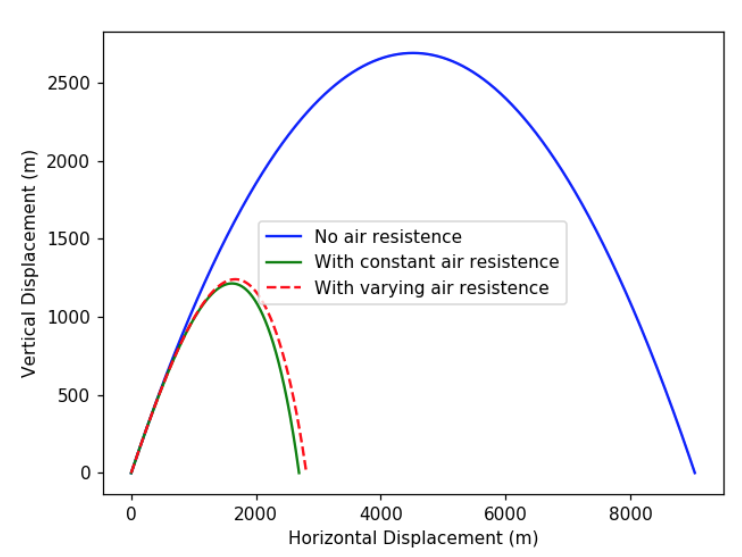

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

Turning on air resistance with constant $c$ impacts the motion more